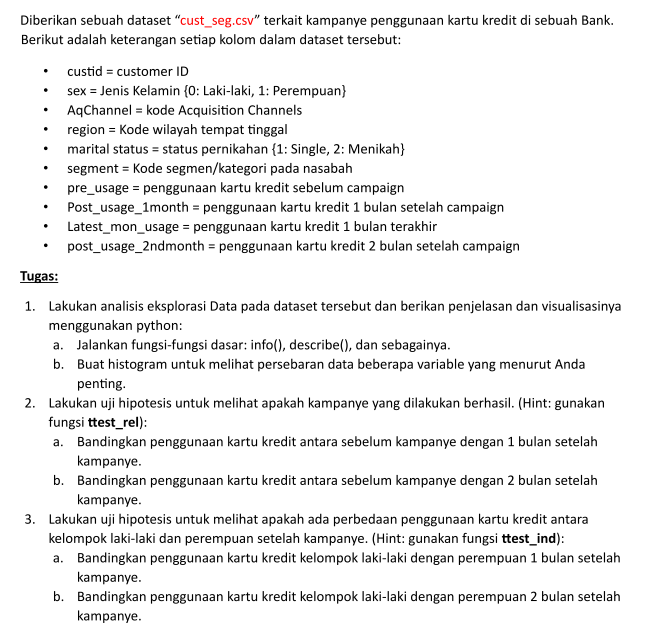

In [ ]:
# Packages import
from math import ceil
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
import seaborn as sns
import statsmodels.stats.api as sms

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Collection and preparing the data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Gcolab/cust_segt.csv')
df.head()

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
0,70,0,4,1,1,1,57,52,49.2,57.2
1,121,1,4,2,1,3,68,59,63.6,64.9
2,86,0,4,3,1,1,44,33,64.8,36.3
3,141,0,4,3,1,3,63,44,56.4,48.4
4,172,0,4,2,1,2,47,52,68.4,57.2


# **Soal No.1:** Exploratory Data Analysis

## 1.1 Check Null Values

In [ ]:
df.isna().sum()

custid                 0
sex                    0
AqChannel              0
region                 0
Marital_status         0
segment                0
pre_usage              0
Post_usage_1month      0
Latest_mon_usage       0
post_usage_2ndmonth    0
dtype: int64

## 1.2 Check Duplicate Data

In [ ]:
# Memeriksa jumlah Row dan Kolom
df.shape

(200, 10)

In [ ]:
# Memeriksa duplikasi data dari kolom custid yang muncul beberapa kali pada dataset
session_counts = df['custid'].value_counts(ascending = False)
multi_users = session_counts[session_counts > 1] .count()

print(f'There are {multi_users} user that appear multiple times in the dataset')

There are 0 user that appear multiple times in the dataset


## 1.3 Check Dataset informations

In [ ]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   custid               200 non-null    int64  
 1   sex                  200 non-null    int64  
 2   AqChannel            200 non-null    int64  
 3   region               200 non-null    int64  
 4   Marital_status       200 non-null    int64  
 5   segment              200 non-null    int64  
 6   pre_usage            200 non-null    int64  
 7   Post_usage_1month    200 non-null    int64  
 8   Latest_mon_usage     200 non-null    float64
 9   post_usage_2ndmonth  200 non-null    float64
dtypes: float64(2), int64(8)
memory usage: 15.8 KB


In [ ]:
# Check data stats
df.describe()

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.54500,3.430000,2.055000,1.160000,2.025000,52.230000,52.775000,63.174000,58.052500
std,57.879185,0.49922,1.039472,0.724291,0.367526,0.690477,10.252937,9.478586,11.242137,10.426445
min,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,28.000000,31.000000,39.600000,34.100000
25%,50.750000,0.00000,3.000000,2.000000,1.000000,2.000000,44.000000,45.750000,54.000000,50.325000
50%,100.500000,1.00000,4.000000,2.000000,1.000000,2.000000,50.000000,54.000000,62.400000,59.400000
75%,150.250000,1.00000,4.000000,3.000000,1.000000,2.250000,60.000000,60.000000,70.800000,66.000000
max,200.000000,1.00000,4.000000,3.000000,2.000000,3.000000,76.000000,67.000000,90.000000,73.700000


# 1.4 Histogram

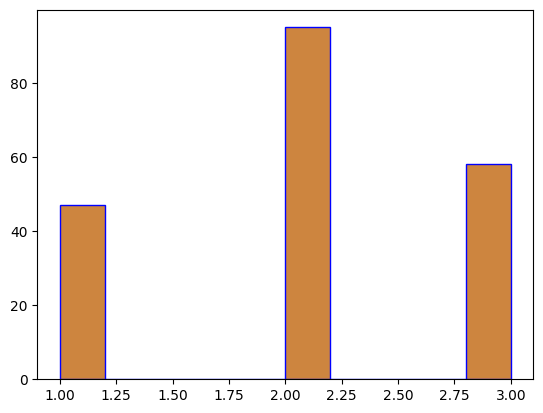

In [ ]:
# Melihat Histogram dari Region wilayah
plt.hist(df['region'],
         facecolor = 'peru',
         edgecolor = 'blue',
         )

plt.show()

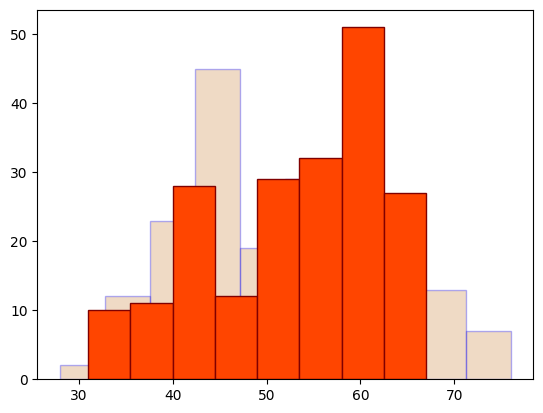

In [ ]:
# melihat Histogram dari penggunaan KK sebelum campaign dan 1 bulan setelah campaign

plt.hist(df['pre_usage'],
         facecolor = 'peru',
         edgecolor = 'blue',
         bins = 10,
         alpha = 0.3,
         label = 'Penggunaan kartu kredit sebelum campaign')

plt.hist(df['Post_usage_1month'],
         facecolor = 'orangered',
         edgecolor = 'maroon',
         label = 'Penggunaan kartu kredit 1bulan setelah campaign',
         bins = 8)

plt.show()

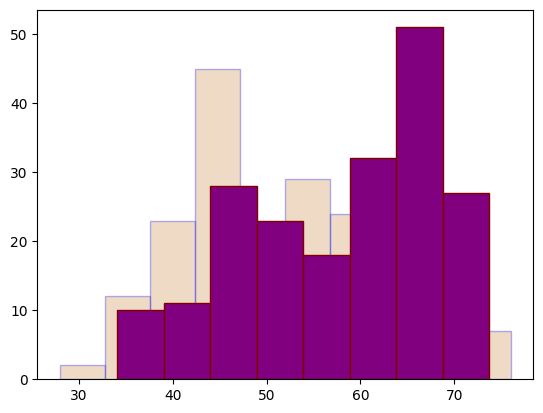

In [ ]:
# melihat Histogram dari penggunaan KK sebelum campaign dan 2 bulan setelah campaign

plt.hist(df['pre_usage'],
         facecolor = 'peru',
         edgecolor = 'blue',
         bins = 10,
         alpha = 0.3,
         label = 'Penggunaan kartu kredit sebelum campaign')

plt.hist(df['post_usage_2ndmonth'],
         facecolor = 'purple',
         edgecolor = 'maroon',
         label = 'Penggunaan kartu kredit 1bulan setelah campaign',
         bins = 8)

plt.show()

# **Soal No.2:**
uji hipotesis untuk melihat apakah kampanye yang dilakukan berhasil. (Hint: gunakan fungsi ttest_rel)

## **2.a** Bandingkan penggunaan kartu kredit antara sebelum kampanye dengan 1 bulan setelah kampanye.

H0: Penggunaan kartu kredit sebelum kampanye(pre_usage)

H1: Penggunaan kartu kredit setelah 1bulan kampanye(Post_usage_1month)

In [ ]:
usage_before = df['pre_usage']
usage_after1 = df['Post_usage_1month']
t_stat, p_value = ttest_rel(usage_before, usage_after1)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -0.8673065458794775
P-value: 0.3868186820914985


**Kesimpulan:** Nilai p-value menggunakan ttest_rel lebih dari α=0.05, jadi H0 diterima karena tidak terlihat perbedaan yang signifikan antara sebelum campaign dan setelah 1bulan campaign

## **2.b** Bandingkan penggunaan kartu kredit antara sebelum kampanye dengan 2 bulan setelah kampanye.

H0: Penggunaan kartu kredit sebelum kampanye(pre_usage)

H1: Penggunaan kartu kredit setelah 2bulan kampanye(Post_usage_2ndmonth)

In [ ]:
usage_before = df['pre_usage']
usage_after2 = df['post_usage_2ndmonth']
t_stat, p_value = ttest_rel(usage_before, usage_after2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -8.866832246938742
P-value: 4.295733828012836e-16


**Kesimpulan:** Nilai p-value menggunakan ttest_rel lebih dari α=0.05, jadi H0 diterima karena tidak terlihat perbedaan yang signifikan antara sebelum campaign dan setelah 2bulan campaign

##  **Soal 3:** Lakukan uji hipotesis untuk melihat apakah ada perbedaan penggunaan kartu kredit antara kelompok laki-laki dan perempuan setelah kampanye. (Hint: gunakan fungsi ttest_ind)

**Copy data untuk melakukan manipulasi pada data**

In [ ]:
df_c = df.copy()

In [ ]:
df_c.head()

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
0,70,0,4,1,1,1,57,52,49.2,57.2
1,121,1,4,2,1,3,68,59,63.6,64.9
2,86,0,4,3,1,1,44,33,64.8,36.3
3,141,0,4,3,1,3,63,44,56.4,48.4
4,172,0,4,2,1,2,47,52,68.4,57.2


**Rename Value for Better Understanding**

In [ ]:
# Merubah nilai pada kolom sex 0=Male, 1=Female
df_c['sex'] = df_c['sex'].replace({
    0 :'Male',
    1 : 'Female'
})

In [ ]:
df_c.head()

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
0,70,Male,4,1,1,1,57,52,49.2,57.2
1,121,Female,4,2,1,3,68,59,63.6,64.9
2,86,Male,4,3,1,1,44,33,64.8,36.3
3,141,Male,4,3,1,3,63,44,56.4,48.4
4,172,Male,4,2,1,2,47,52,68.4,57.2


## **3.a:** Bandingkan penggunaan kartu kredit kelompok laki-laki dengan perempuan 1 bulan setelah kampanye.

H0: Penggunaan kartu kredit sebelum kampanye(pre_usage)

H1: Penggunaan kartu kredit setelah 1bulan kampanye(Post_usage_1month)

In [ ]:
# Lakukan filterisasi berdasarkan kategori sex
usage_after_male = df_c[df_c['sex'] == 'Male']['Post_usage_1month']
usage_after_female = df_c[df_c['sex'] == 'Female']['Post_usage_1month']

# lakukan uji independent t-test
t_stat, p_value = ttest_ind(usage_after_male, usage_after_female)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -3.7340738531536797
P-value: 0.00024625461203549315


**Kesimpulan:** Nilai p-value kurang dari α=0.05 menggunakan ttest_ind, jadi **gagal** untuk menerima H0 karena **ada perbedaan** yang signifikan antara sebelum campaign dan setelah 1bulan campaign baik pada gender Male ataupun Female. Jadi menolak H0 dan menerima H1.

## **3.b:** Bandingkan penggunaan kartu kredit kelompok laki-laki dengan perempuan 2 bulan setelah kampanye.

In [ ]:
# Lakukan filterisasi berdasarkan kategori sex
usage_after_men = df_c[df_c['sex'] == 'Male']['post_usage_2ndmonth']
usage_after_women = df_c[df_c['sex'] == 'Female']['post_usage_2ndmonth']

# lakukan uji independent t-test
t_stat, p_value = ttest_ind(usage_after_men, usage_after_women)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -3.7340738531536926
P-value: 0.0002462546120354815


**Kesimpulan:** Nilai p-value lebih dari α=0.05 menggunakan ttest_ind, jadi **gagal** untuk menolak H0 karena **tidak ada perbedaan** yang signifikan antara sebelum campaign dan setelah 2bulan campaign baik pada gender Male ataupun Female. Jadi Menerima H0 dan menolak H1.